In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import font_manager
import pandas as pd

m_font = font_manager.FontProperties(fname='/Library/Fonts/Hiragino Sans GB W3.otf',size = 9) 
names = ["对数的定义(上)","集合的基本运算-交集","平方根","点到圆的距离"]

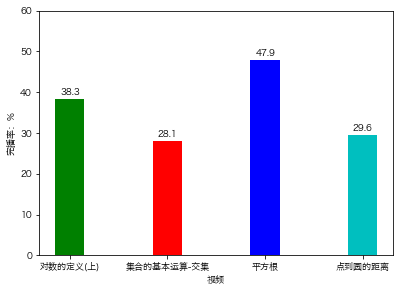

In [128]:
# 四个视频完播率
ratios = [38.3,28.1,47.9,29.6]

fig = plt.figure()
ax = fig.add_axes([0.12,0.12,0.82,0.85])

ax.set_ylabel("完播率：%",fontproperties = m_font)
ax.set_xlabel("视频",fontproperties = m_font)
ax.set_ylim([0,60])
ax.set_yticklabels(range(0,70,10),fontproperties = m_font)
ax.set_xticks(range(4))
ax.set_xticklabels(names,fontproperties = m_font)

ax.bar(range(4),ratios,width = 0.3,color = ["g","r","b","c"])

for i,r in enumerate(ratios):
    ax.text(i - 0.1,r + 1,str(r),fontproperties = m_font)

fig.savefig("/Users/s/Desktop/完播率.png",dpi = 600)
plt.show()

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:5088: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


(9.2620000000000005, 44.279574756842344)
(4.9100000000000001, 52.491616167558988)
(8.3390000000000004, 34.62878218700908)
(10.443, 32.732632024851739)


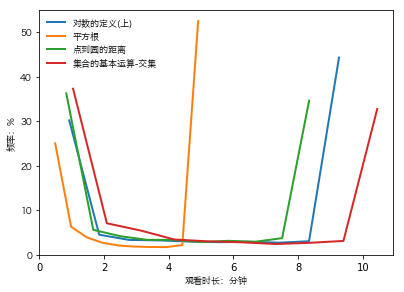

In [139]:
#四个视频的播放时长分布
duration = {"点到圆的距离":500.320,"平方根":294.613,"集合的基本运算-交集":626.591,"对数的定义(上)":555.724}
colors = ["g","r","b","c"]

excel_filepath = "/Users/s/Downloads/query_result(85).xlsx"
dataframe = pd.read_excel(excel_filepath,header = 0)
grouped = dataframe.groupby("lunxi_20171120_video_1.video_name")

fig = plt.figure()
ax = fig.add_axes([0.12,0.12,0.82,0.85])

ax.set_ylabel("频率：%",fontproperties = m_font)
ax.set_xlabel("观看时长：分钟",fontproperties = m_font)
ax.set_ylim([0,55])
ax.set_yticks(range(0,60,10))
ax.set_yticklabels(range(0,60,10),fontproperties = m_font)
# ax.set_xticks(list([x / 10 for x in range(0,12,2)]))
ax.set_xticks(range(0,12,2))
# ax.set_xticklabels(list([str(x * 10) for x in range(0,12,2)]),fontproperties = m_font)

for name,group in grouped:
    data = group["lunxi_20171120_video_1.time"]
    data[(data * 60) > duration[name]] = duration[name] / 60
#     data[data > 1] = 1
    data_cnt = data.value_counts(sort = False,bins = 10)
    
    index = data_cnt.index
    values = []
    for i,d in enumerate(data_cnt):
        values.append((index[i].right,d / data.count() * 100))
    values.sort(key = lambda x: x[0])
    print(values[-1])
    z = list(zip(*values))
    ax.plot(z[0],z[1],label = name,lw = 2)

ax.legend(loc = "upper left",handlelength = 2,labelspacing = 0.5,frameon = False,ncol = 1,prop = m_font)

plt.show()
# fig.savefig("/Users/s/Desktop/观看时长.png",dpi = 600)
    


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:5088: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


(1.0, 19.442139781122833)
(1.0, 12.483082753020497)
(1.0, 15.774767660815161)
(1.0, 17.286991172482498)


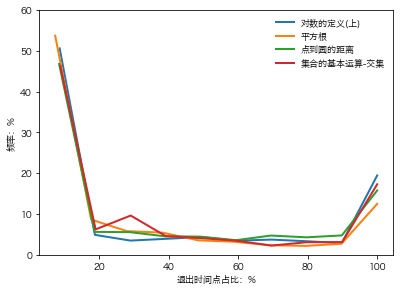

In [5]:
#四个视频的退出时间点分布

excel_filepath = "/Users/s/Downloads/query_result(87).xlsx"
dataframe = pd.read_excel(excel_filepath,header = 0)
grouped = dataframe.groupby("lunxi_20171122_video_1.video_name")

fig = plt.figure()
ax = fig.add_axes([0.12,0.12,0.82,0.85])

ax.set_ylabel("频率：%",fontproperties = m_font)
ax.set_xlabel("退出时间点占比：%",fontproperties = m_font)
ax.set_ylim([0,60])
ax.set_yticks(range(0,70,10))
ax.set_yticklabels(range(0,70,10),fontproperties = m_font)
ax.set_xticks(list([x / 10 for x in range(0,12,2)]))
ax.set_xticklabels(list([str(x * 10) for x in range(0,12,2)]),fontproperties = m_font)

for name,group in grouped:
    data = group["lunxi_20171122_video_1.exit_ratio"]
    data[data > 1] = 1
    data_cnt = data.value_counts(sort = False,bins = 10)
    
    index = data_cnt.index
    values = []
    for i,d in enumerate(data_cnt):
        values.append((index[i].right,d / data.count() * 100))
    values.sort(key = lambda x: x[0])
    print(values[-1])
    z = list(zip(*values))
    ax.plot(z[0],z[1],label = name,lw = 2)

ax.legend(loc = "upper right",handlelength = 2,labelspacing = 0.5,frameon = False,ncol = 1,prop = m_font)

plt.show()
fig.savefig("/Users/s/Desktop/退出时间点.png",dpi = 600)